In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_long_salary_18-19')

In [21]:
qbs.dtypes

NAME          object
LONG           int64
LONG_rank    float64
salary         int64
dtype: object

In [22]:
qbs.head()

,NAME,LONG,LONG_rank,salary
0,Ben Roethlisberger,97,1.0,21850000
1,Patrick Mahomes,89,3.0,4106447
2,Nick Foles,83,5.0,5500000
3,Cam Newton,82,6.5,20760000
4,Blake Bortles,80,8.0,18000000


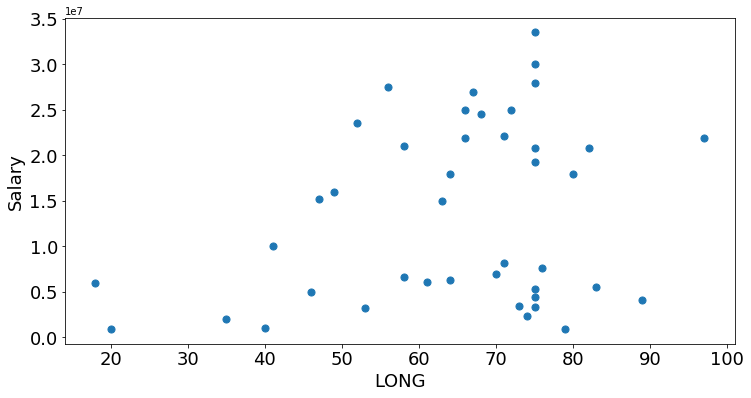

In [23]:
ax = qbs.plot(kind="scatter", x = 'LONG',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('LONG', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [24]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['LONG', 'salary']])

In [25]:
X.mean(axis = 0)

array([-2.11471052e-17, -7.66582565e-17])

In [26]:
X.std(axis = 0)

array([1., 1.])

In [27]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [28]:
km.cluster_centers_

array([[-2.02427135, -0.99564276],
       [ 0.60496452,  1.08028912],
       [ 0.71261778, -0.91979703],
       [-0.53631606,  0.59930034],
       [-0.48654593, -0.84463377]])

In [29]:
km.predict(X)

array([1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 0, 0, 0, 0, 0],
      dtype=int32)

In [30]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,LONG,LONG_rank,salary,clusters
0,Ben Roethlisberger,97,1.0,21850000,1
1,Patrick Mahomes,89,3.0,4106447,2
2,Nick Foles,83,5.0,5500000,2
3,Cam Newton,82,6.5,20760000,1
4,Blake Bortles,80,8.0,18000000,1


In [31]:
ss.inverse_transform(km.cluster_centers_)

array([[3.08000000e+01, 3.99770600e+06],
       [7.45714286e+01, 2.41285595e+07],
       [7.63636364e+01, 4.73320182e+06],
       [5.55714286e+01, 1.94642857e+07],
       [5.64000000e+01, 5.46207960e+06]])

In [32]:
qbs.groupby('clusters')[['LONG', 'salary']].mean()

,LONG,salary
clusters,,
0,30.800000,3.997706e+06
1,74.571429,2.412856e+07
2,76.363636,4.733202e+06
3,55.571429,1.946429e+07
4,56.400000,5.462080e+06


In [33]:
centroids = qbs.groupby('clusters')[['LONG', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

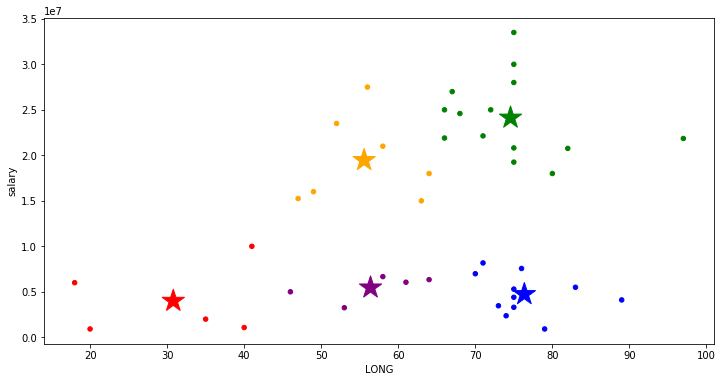

In [34]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'LONG', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'LONG', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [35]:
km.inertia_

12.922418000355078

In [36]:
silhouette_score(X, km.labels_)

0.41883752525155177